# `README.md`
---

In [1]:
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "figure.dpi": 144,
    "figure.figsize": (6,3),
})

%config InlineBackend.figure_format = 'retina'

## A Star Network

Using Apple Silicon GPU (MPS) for pytorch


(np.float64(-4.0), np.float64(4.0), np.float64(-4.0), np.float64(4.0))

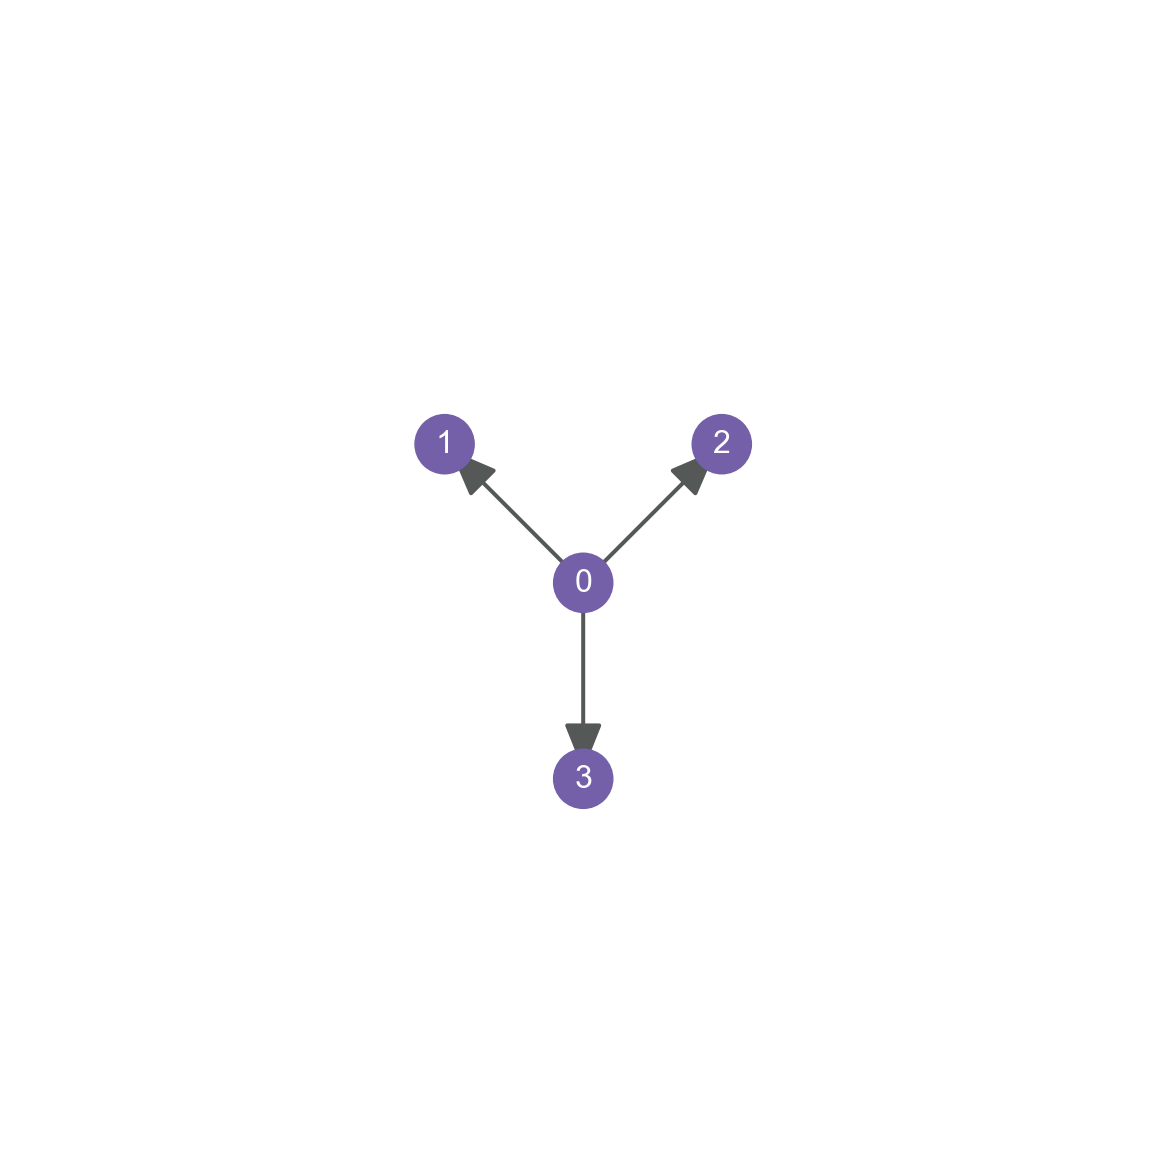

In [2]:
import numpy as np
import netsci.visualization as nsv


A = np.array([[0, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
nsv.plot_directed_network(A, pos=[[0, 0], [-1, 1], [1, 1], [0, -np.sqrt(2)]])

plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.axis("off")

In [3]:
import netsci.metrics.motifs as nsm


f = nsm.motifs(A, algorithm="brute-force")
print(f)

[1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


Text(0, 0.5, 'Frequencies')

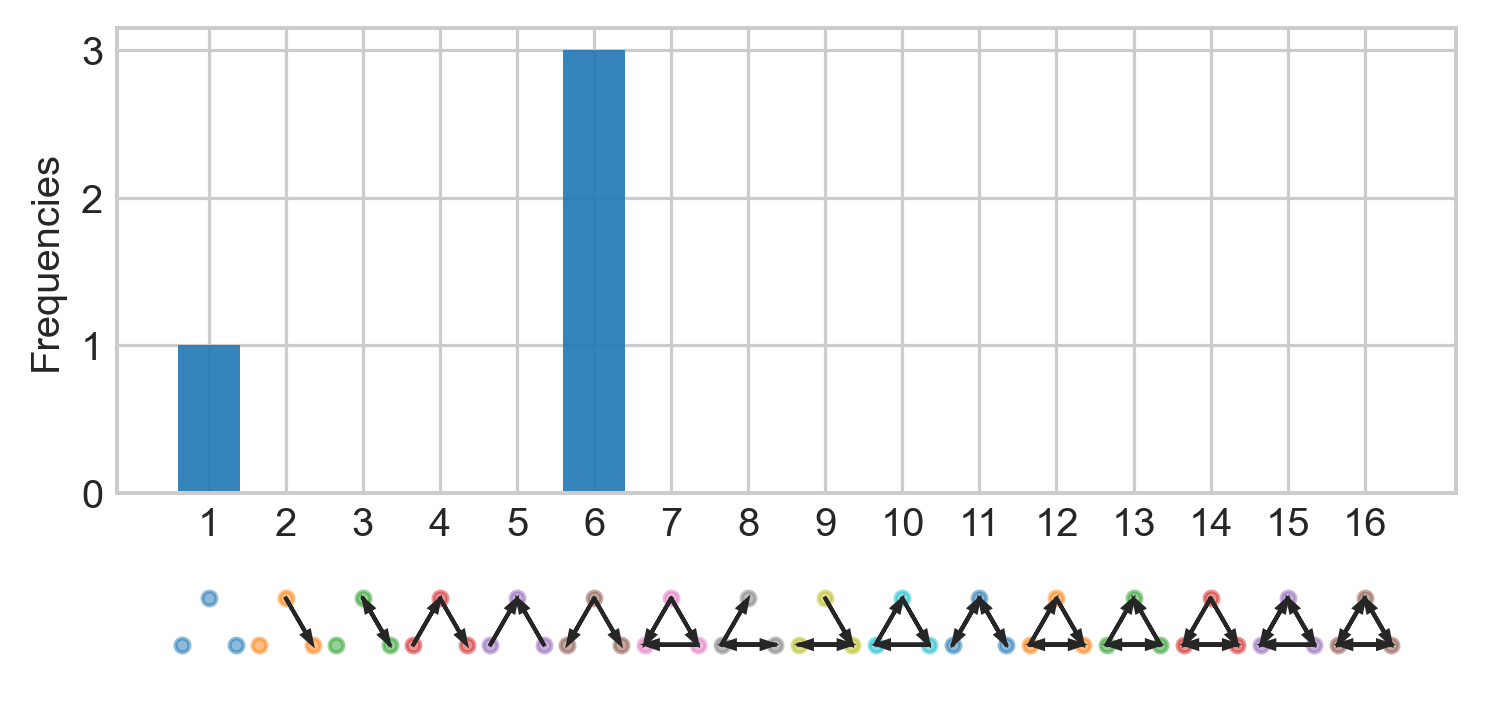

In [4]:
ax = nsv.bar_motifs(f)

ax[0].set_yticks(range(max(f) + 1))
ax[0].set_ylabel("Frequencies")

## Using GPU

In [5]:
from netsci.models.random import erdos_renyi


A_er = erdos_renyi(n=500, p=0.2, random_state=71070)  # Create an Erdős–Rényi network
f_er = nsm.motifs(A_er, algorithm="gpu")  # Count motifs using a GPU
print(f_er)

[5447433 8132356 1031546 2023563 1011703 1011109  503098  512458  513352
  167427   64844  127751   64442   63548   32483    1387]


In [6]:
with np.printoptions(linewidth=70):
    print(f_er)

[5447433 8132356 1031546 2023563 1011703 1011109  503098  512458
  513352  167427   64844  127751   64442   63548   32483    1387]


In [7]:
[k for k in plt.rcParams.keys() if "opacity" in k]

[]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


Text(0, 0.5, 'Frequencies')

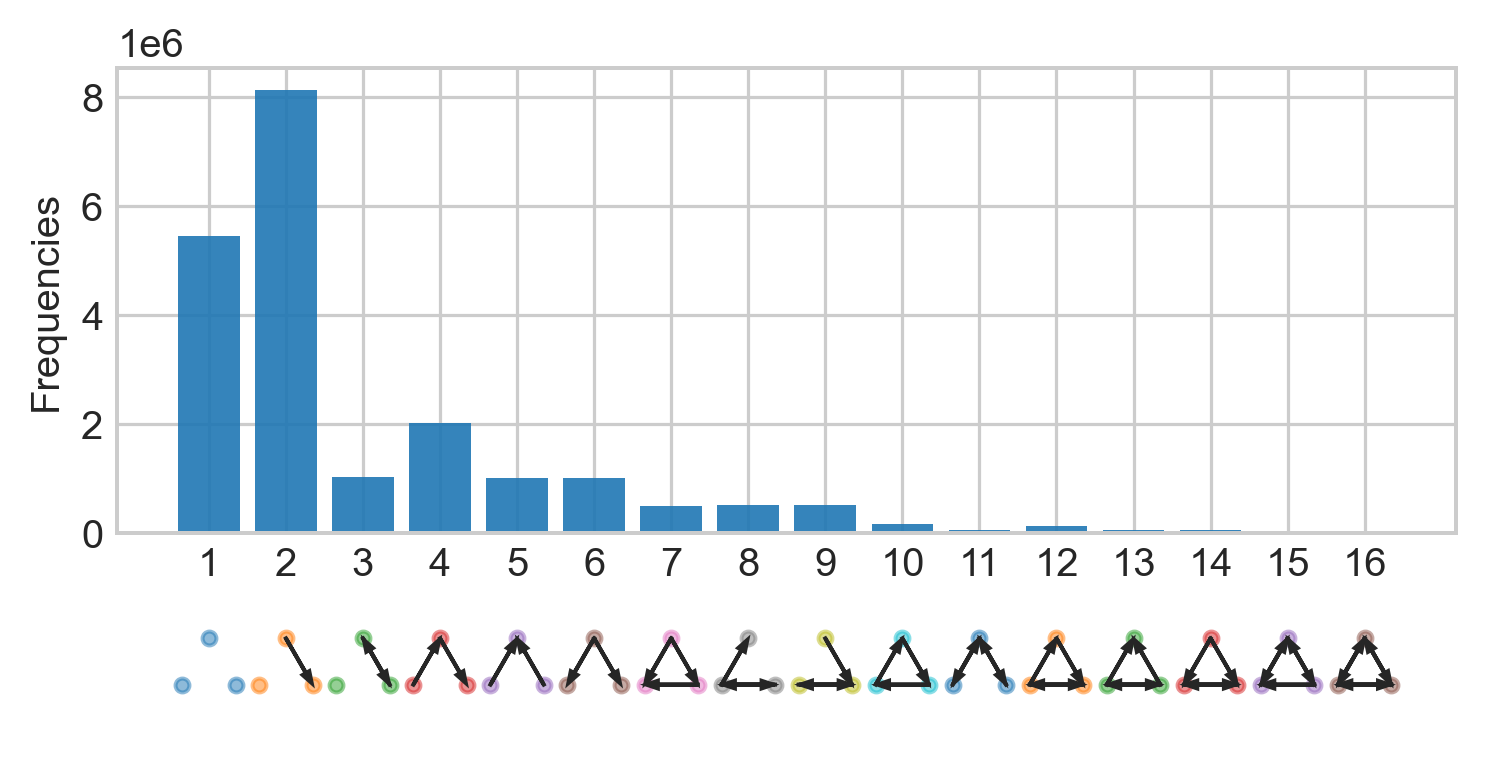

In [8]:
ax = nsv.bar_motifs(f_er)
ax[0].set_ylabel("Frequencies")